In [1]:
# !unzip text_data.zip

Archive:  text_data.zip
   creating: text_data/
  inflating: __MACOSX/._text_data    
  inflating: text_data/.DS_Store     
  inflating: __MACOSX/text_data/._.DS_Store  
   creating: text_data/agn_small/
  inflating: __MACOSX/text_data/._agn_small  
   creating: text_data/dbpedia_small/
  inflating: __MACOSX/text_data/._dbpedia_small  
  inflating: text_data/agn_small/train.jsonl  
  inflating: text_data/agn_small/test.jsonl  
  inflating: text_data/agn_small/dev.jsonl  
  inflating: text_data/dbpedia_small/train.jsonl  
  inflating: text_data/dbpedia_small/test.jsonl  
  inflating: text_data/dbpedia_small/dev.jsonl  


In [21]:
from my_dataset import MyDataset
from load_data import *
from preprocess import *
# from run_torch_model import *
from run_torch_model_CUDA import *
from text_model import *

import gensim.downloader
import gensim

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report
import time
import csv
import os

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

In [3]:
device = torch.device('cuda' if torch.cuda.is_available()  else 'cpu')
print('Using device: ', device)

Using device:  cuda


In [5]:
nltk.download('stopwords')
print("DONE WITH STOPWORDS DOWNLOAD")
# glove = gensim.downloader.load('glove-wiki-gigaword-50')
glove = gensim.downloader.load('glove-wiki-gigaword-300')
print("DONE WITH GLOVE DOWNLOAD")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
DONE WITH STOPWORDS DOWNLOAD
DONE WITH GLOVE DOWNLOAD


In [6]:
folder = 'text_data'

# AGN Data
agn_sub_folder = 'agn_small'
agn_path = os.path.join(folder, agn_sub_folder)

# DBPedia Data
dbpedia_sub_folder = 'dbpedia_small'
dbpedia_path = os.path.join(folder, dbpedia_sub_folder)

# Loading both datasets
train_agn, dev_agn, test_agn = load_data(agn_path)
train_dbpedia, dev_dbpedia, test_dbpedia = load_data(dbpedia_path)

# Texts & Labels - AGN
train_texts_agn = [x['text'] for x in train_agn]
train_labels_agn = [x['label'] for x in train_agn]
dev_texts_agn = [x['text'] for x in dev_agn]
dev_labels_agn = [x['label'] for x in dev_agn]
test_texts_agn = [x['text'] for x in test_agn]
test_labels_agn = [x['label'] for x in test_agn]

# Texts & Labels - DBPedia
train_texts_dbpedia = [x['text'] for x in train_dbpedia]
train_labels_dbpedia = [x['label'] for x in train_dbpedia]
dev_texts_dbpedia = [x['text'] for x in dev_dbpedia]
dev_labels_dbpedia = [x['label'] for x in dev_dbpedia]
test_texts_dbpedia = [x['text'] for x in test_dbpedia]
test_labels_dbpedia = [x['label'] for x in test_dbpedia]

In [7]:
def docs_to_vecs(texts):

    doc_vecs = []
    
    for text in texts:

        lst_vec = []
    
        for word in text:
            try:
                lst_vec.append(glove.get_vector(word))
            except:
                pass # Ignore word if it's not in vocabulary of glove_50
    
        vec = np.array(lst_vec)
        np_vec = np.concatenate((np.min(vec, axis=0), np.max(vec, axis=0), np.mean(vec, axis=0)))

        doc_vecs.append(np_vec)
    
    return np.array(doc_vecs)

In [8]:
preprocessed_train_texts = preprocess_texts(train_texts_agn)
print("PREPROCESSED TRAIN TEXTS: ", len(preprocessed_train_texts))
preprocessed_dev_texts = preprocess_texts(dev_texts_agn)
print("PREPROCESSED DEV TEXTS: ", len(preprocessed_dev_texts))
preprocessed_test_texts = preprocess_texts(test_texts_agn)
print("PREPROCESSED TEST TEXTS: ", len(preprocessed_test_texts))

PREPROCESSED TRAIN TEXTS:  5000
PREPROCESSED DEV TEXTS:  5000
PREPROCESSED TEST TEXTS:  5000


In [9]:
train_features = docs_to_vecs(preprocessed_train_texts)
print("TRAIN FEATURES SHAPE ", train_features.shape)
dev_features = docs_to_vecs(preprocessed_dev_texts)
print("DEV FEATURES SHAPE ", dev_features.shape)
test_features = docs_to_vecs(preprocessed_test_texts)
print("TEST FEATURES SHAPE ", test_features.shape)

TRAIN FEATURES SHAPE  (5000, 900)
DEV FEATURES SHAPE  (5000, 900)
TEST FEATURES SHAPE  (5000, 900)


In [10]:
train_dataset = MyDataset(train_features, train_labels_agn)
dev_dataset = MyDataset(dev_features, dev_labels_agn)
test_dataset = MyDataset(test_features, test_labels_agn)

In [62]:
model = Text_Classifier(input_size = train_features.shape[1]
                        , output_size = len(np.unique(train_labels_agn)))

trained_model, loss, accuracy = run_model(model
                                          , running_mode='train'
                                          , train_set = train_dataset
                                          , valid_set = dev_dataset
                                          , batch_size = 10
                                          , stop_thr=1e-5
                                          , learning_rate = 1e-4
                                          , n_epochs = 350
                                          , shuffle = True
                                          , device=device)

STARTING EPOCH #0
STARTING EPOCH #1
STARTING EPOCH #2
STARTING EPOCH #3
STARTING EPOCH #4
STARTING EPOCH #5
STARTING EPOCH #6
STARTING EPOCH #7
STARTING EPOCH #8
STARTING EPOCH #9
STARTING EPOCH #10
STARTING EPOCH #11
STARTING EPOCH #12
STARTING EPOCH #13
STARTING EPOCH #14
STARTING EPOCH #15
STARTING EPOCH #16
STARTING EPOCH #17
STARTING EPOCH #18
STARTING EPOCH #19
STARTING EPOCH #20
STARTING EPOCH #21
STARTING EPOCH #22
STARTING EPOCH #23
STARTING EPOCH #24
STARTING EPOCH #25
STARTING EPOCH #26
STARTING EPOCH #27
STARTING EPOCH #28
STARTING EPOCH #29
STARTING EPOCH #30
STARTING EPOCH #31
STARTING EPOCH #32
STARTING EPOCH #33
STARTING EPOCH #34
STARTING EPOCH #35
STARTING EPOCH #36
STARTING EPOCH #37
STARTING EPOCH #38
STARTING EPOCH #39
STARTING EPOCH #40
STARTING EPOCH #41
STARTING EPOCH #42
STARTING EPOCH #43
STARTING EPOCH #44
STARTING EPOCH #45
STARTING EPOCH #46
STARTING EPOCH #47
STARTING EPOCH #48
STARTING EPOCH #49
STARTING EPOCH #50
STARTING EPOCH #51
STARTING EPOCH #52
STA

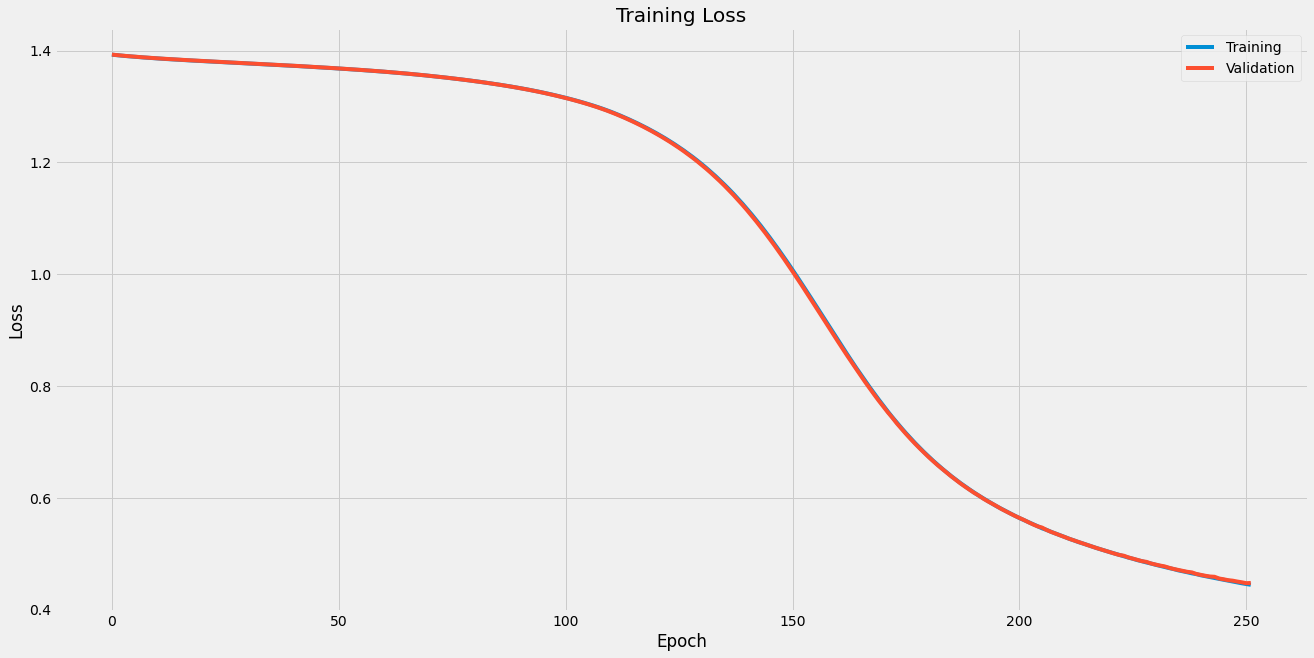

In [60]:
plt.figure(figsize=(20,10))
n_epochs = 252
plt.plot(range(n_epochs), loss['train'], label='Training')
plt.plot(range(n_epochs), loss['valid'], label='Validation')

plt.title('Training Loss')
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.legend()

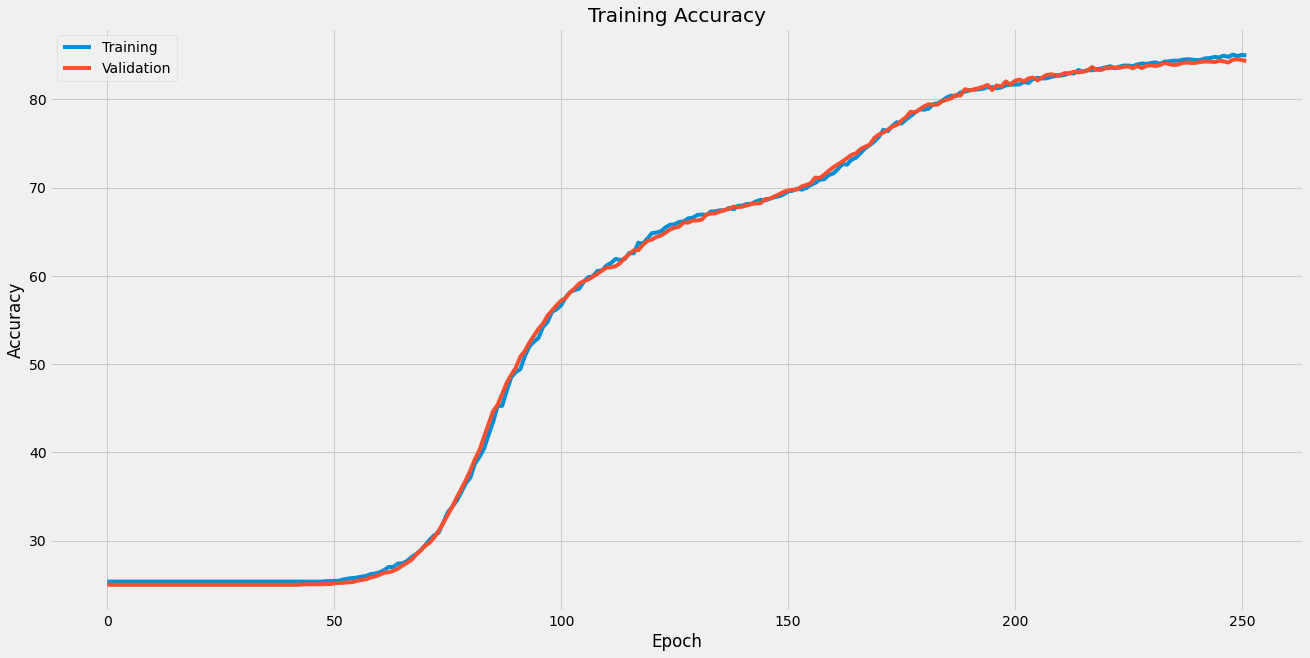

In [61]:
plt.figure(figsize=(20,10))
plt.plot(range(n_epochs), accuracy['train'], label='Training')
plt.plot(range(n_epochs), accuracy['valid'], label='Validation')

plt.title('Training Accuracy')
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend()

## TESTING

In [57]:
test_loss, test_accuracy = run_model(model
                                      , running_mode='test'
                                      , test_set = test_dataset
                                      , batch_size = len(test_features)
                                      , shuffle = True)

print("TEST LOSS ", test_loss)
print("TEST ACCURACY ", test_accuracy)

TEST LOSS  0.4430743157863617
TEST ACCURACY  84.36


In [58]:
test_dataloader = torch.utils.data.DataLoader(test_dataset
                                                , batch_size=len(test_dataset) # Will just 1 batch work?
                                                , shuffle=False
                                                , num_workers=2) 

with torch.no_grad():

    for batch, labels in test_dataloader:

        batch, labels = batch.to(device), labels.to(device)

        output = trained_model(batch.float())

        predicted = torch.max(output.data, 1)[1]

print(classification_report(test_labels_agn, predicted.cpu()))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1250
           1       0.94      0.95      0.94      1250
           2       0.78      0.79      0.78      1250
           3       0.77      0.78      0.78      1250

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000

